In [1]:
import lime
import lime.lime_tabular
import sklearn
import numpy as np
import pandas as pd
import sklearn
import sklearn.ensemble
import sklearn.metrics
import scipy.io
from __future__ import print_function
np.random.seed(1)
%matplotlib inline
import matplotlib.pyplot as plt

/home/nisha/lime-demo/env_lime/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Loading data
Breast Cancer Wisconsin (Diagnostic) Data Set
Predict whether the cancer is benign or malignant

In [2]:
mat = scipy.io.loadmat('./data/wbc.mat')
wbc_df = pd.DataFrame(np.hstack((mat['X'], mat['y'])))
wbc_df.columns = ["radius_mean", "texture_mean","perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
                  "concavity_mean", "concave.points_mean", "symmetry_mean", "fractal_dimension_mean", 
                  "radius_se", "texture_se","perimeter_se", "area_se", "smoothness_se", "compactness_se", 
                  "concavity_se", "concave.points_se", "symmetry_se", "fractal_dimension_se", 
                  "radius_worst", "texture_worst","perimeter_worst", "area_worst", "smoothness_worst", 
                  "compactness_worst", "concavity_worst", "concave.points_worst", "symmetry_worst", 
                  "fractal_dimension_worst",
                  "outlier"]
wbc_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,outlier
0,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,0.162174,...,0.192964,0.245480,0.129276,0.480948,0.145540,0.190895,0.442612,0.278336,0.115112,0.0
1,0.288655,0.202908,0.289130,0.159703,0.495351,0.330102,0.107029,0.154573,0.458081,0.382266,...,0.225746,0.227501,0.109443,0.396421,0.242852,0.150958,0.250275,0.319141,0.175718,0.0
2,0.119409,0.092323,0.114367,0.055313,0.449309,0.139685,0.069260,0.103181,0.381313,0.402064,...,0.097015,0.073310,0.031877,0.404345,0.084903,0.070823,0.213986,0.174453,0.148826,0.0
3,0.286289,0.294555,0.268261,0.161315,0.335831,0.056070,0.060028,0.145278,0.205556,0.182603,...,0.287580,0.169580,0.088650,0.170640,0.018337,0.038602,0.172268,0.083185,0.043618,0.0
4,0.057504,0.241123,0.054730,0.024772,0.301255,0.122845,0.037207,0.029409,0.358081,0.317397,...,0.264925,0.034115,0.014009,0.386515,0.105180,0.054952,0.088110,0.303568,0.124951,0.0


In [3]:
wbc_df.shape

(378, 31)

### Train-Test split, 80%-20%

In [4]:
from sklearn.cross_validation import train_test_split
train, test, labels_train, labels_test = train_test_split(wbc_df.loc[:, wbc_df.columns != 'outlier'], wbc_df['outlier'], train_size=0.80, random_state=123)

/home/nisha/lime-demo/env_lime/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Training model

In [5]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Let's assume this model is good enough

In [6]:
sklearn.metrics.accuracy_score(labels_test, rf.predict(test))

0.9473684210526315

The overall feature importance plot

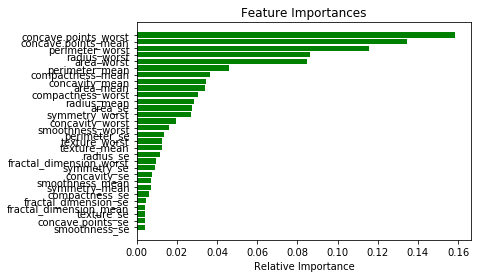

In [7]:
features = train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Create the explainer
Creating a tabular explainer for the training set. 

In [8]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=train.columns, class_names=['benign', 'malignant'], discretize_continuous=False)

### Explaining an instance
Since this is a binary-class classification problem, it explains the class with the top probability by default.

In [9]:
# i = np.random.randint(0, test.shape[0])
i = 1
exp = explainer.explain_instance(test.values[i], rf.predict_proba)
exp.as_list()

[('perimeter_worst', 0.022720254025040874),
 ('concave.points_worst', 0.018522188321386662),
 ('area_worst', 0.016098210118724633),
 ('radius_worst', 0.01535213004703984),
 ('perimeter_mean', 0.011558973112324518),
 ('area_mean', 0.00906764571442316),
 ('radius_mean', 0.006912355430688041),
 ('texture_worst', 0.006149303624562474),
 ('texture_mean', 0.004018357172950033),
 ('compactness_worst', 0.003763674498173455)]

You can also view this as a plot, for some reason Lime's code plots the graph twice!

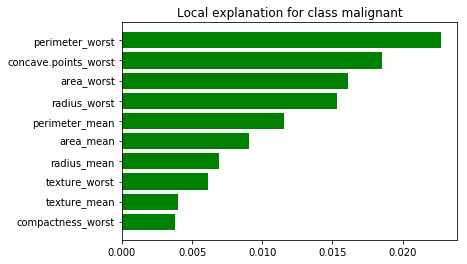

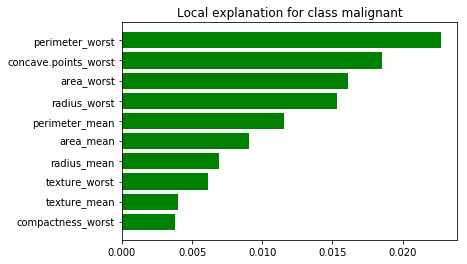

In [10]:
exp.as_pyplot_figure()

### Explaining another instance
Another example, notice how the explanations vary depending on the example you select. In the case below, 'concave.points_worst' has a higher contribution for being an outlier.

In [15]:
i=61 # another malignant tumour example
exp = explainer.explain_instance(test.values[i], rf.predict_proba)
exp.as_list()

[('perimeter_worst', 0.02329154308380648),
 ('concave.points_worst', 0.019545401551679588),
 ('concave.points_mean', 0.01704941246383924),
 ('area_worst', 0.014777968452540828),
 ('radius_worst', 0.013520620790519845),
 ('concavity_mean', 0.012437307656138876),
 ('area_mean', 0.009087503738310208),
 ('perimeter_mean', 0.008582126516291),
 ('radius_mean', 0.006873245338817848),
 ('concavity_worst', 0.0041642705323458205)]